In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

Data is balanced 

In [6]:
df["sentiment"]=df["sentiment"].map({"positive":1,"negative":0})

In [7]:
df["sentiment"].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
df.dtypes

review       object
sentiment     int64
dtype: object

In [10]:
import text_hammer as th


In [11]:
def text_preprocessing(df,col):
    df[col] = df[col].progress_apply(lambda x:str(x).lower())
    df[col] = df[col].progress_apply(lambda x: th.cont_exp(x))   # this is to reduce like you're --> you are or I'm --> I am
    df[col] = df[col].progress_apply(lambda x: th.remove_emails(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_html_tags(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_stopwords(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_special_chars(x))
    df[col] = df[col].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

In [12]:
df = text_preprocessing(df, "review")

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

In [13]:
x = df['review']
y = df['sentiment']
print(x.shape)
print(y.shape)

(50000,)
(50000,)


In [14]:
df_pos=df[df["sentiment"]==1]
df_pos.shape

(25000, 2)

In [15]:
from nltk import word_tokenize, FreqDist


In [16]:
wt_pos =[]
for i in df_pos['review']:
    wt_pos.extend(word_tokenize(i))

freq_dist_positive = FreqDist(wt_pos).most_common(30)
print(freq_dist_positive)

[('film', 48884), ('movie', 43062), ('good', 20931), ('like', 19385), ('time', 14889), ('great', 13966), ('story', 13621), ('character', 13606), ('see', 13510), ('watch', 12089), ('love', 11407), ('think', 10740), ('it', 10719), ('well', 9845), ('scene', 9631), ('play', 9340), ('know', 9094), ('people', 8653), ('way', 8562), ('find', 8521), ('end', 8269), ('life', 8146), ('man', 8092), ('come', 8060), ('go', 7806), ('look', 7731), ('make', 7506), ('year', 7226), ('work', 7080), ('show', 6879)]


In [17]:
df_positive = pd.DataFrame(freq_dist_positive,columns=['word','count'])
df_positive.head()

,word,count
0,film,48884
1,movie,43062
2,good,20931
3,like,19385
4,time,14889


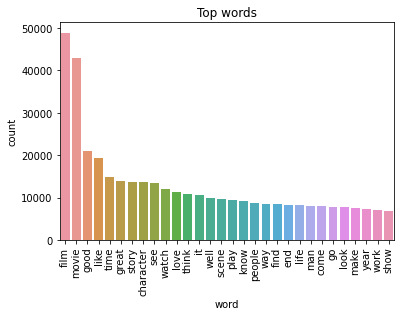

In [19]:
sns.barplot(x='word', y='count', data=df_positive)
plt.xticks(rotation=90)
plt.title("Top words")
plt.show()

In [20]:
from wordcloud import WordCloud

In [21]:
freq_dist_positive = dict(freq_dist_positive)
print(freq_dist_positive)

{'film': 48884, 'movie': 43062, 'good': 20931, 'like': 19385, 'time': 14889, 'great': 13966, 'story': 13621, 'character': 13606, 'see': 13510, 'watch': 12089, 'love': 11407, 'think': 10740, 'it': 10719, 'well': 9845, 'scene': 9631, 'play': 9340, 'know': 9094, 'people': 8653, 'way': 8562, 'find': 8521, 'end': 8269, 'life': 8146, 'man': 8092, 'come': 8060, 'go': 7806, 'look': 7731, 'make': 7506, 'year': 7226, 'work': 7080, 'show': 6879}


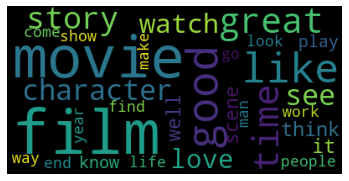

In [22]:
wc_positive = WordCloud().generate_from_frequencies(freq_dist_positive)
# plt.figure(figsize=(10,10))
plt.imshow(wc_positive)
plt.axis('off')
plt.show()

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
max_words = 30000
max_len = 100

tk = Tokenizer(num_words=max_words)
tk.fit_on_texts(x)

print(len(tk.word_index))
print(tk.word_counts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
max_lenth = 100
sequences = tk.texts_to_sequences(x)
x_pad = pad_sequences(sequences,maxlen=max_len)

In [27]:
x_pad.shape

(50000, 100)

In [28]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Flatten
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
vocab_size = max_words + 1
embedding_dim = 64
print(vocab_size)
print(embedding_dim)
print(x_pad.shape)

30001
64
(50000, 100)


In [30]:
m1 = Sequential()
m1.add(Embedding(vocab_size,embedding_dim,input_length=x_pad.shape[1]))    
m1.add(LSTM(200, return_sequences=True))
m1.add(Dropout(0.5))
m1.add(LSTM(200,return_sequences=True))
m1.add(Dropout(0.5))
m1.add(LSTM(200))
m1.add(Dropout(0.5))
m1.add(Dense(128))
m1.add(Dropout(0.5))
m1.add(Dense(1,activation='sigmoid'))

m1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [31]:
h1 = m1.fit(x_pad,y,batch_size=64,epochs=5)


Epoch 1/5
782/782 [==============================] - 1451s 2s/step - loss: 0.3569 - acc: 0.8454
Epoch 2/5
782/782 [==============================] - 1430s 2s/step - loss: 0.2043 - acc: 0.9237
Epoch 3/5
782/782 [==============================] - 1438s 2s/step - loss: 0.1249 - acc: 0.9551
Epoch 4/5
782/782 [==============================] - 1442s 2s/step - loss: 0.0804 - acc: 0.9728
Epoch 5/5
782/782 [==============================] - 1442s 2s/step - loss: 0.0569 - acc: 0.9807


In [32]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           1920064   
                                                                 
 lstm (LSTM)                 (None, 100, 200)          212000    
                                                                 
 dropout (Dropout)           (None, 100, 200)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 200)          320800    
                                                                 
 dropout_1 (Dropout)         (None, 100, 200)          0         
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0

In [33]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,acc,Epochs
0,0.356946,0.84538,0
1,0.204299,0.92366,1
2,0.124932,0.95508,2
3,0.080414,0.97280,3
4,0.056856,0.98070,4


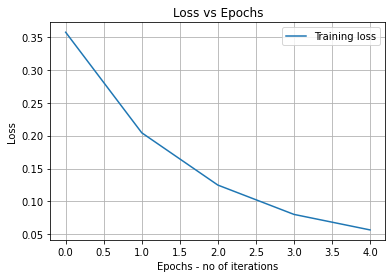

In [34]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
# plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

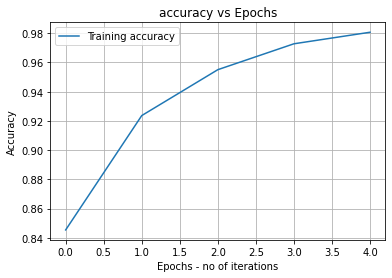

In [35]:
plt.plot(r1['Epochs'],r1['acc'],label='Training accuracy')
# plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.title('accuracy vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [36]:
df0 = df[df['sentiment']==0]
df1 = df[df['sentiment']==1]
print(df0.shape)
print(df1.shape)

(25000, 2)
(25000, 2)


In [38]:
df0['review'][:5]


3     basically family little boy jake think zombie ...
7     amazing fresh innovative idea 70 air 7 8 year ...
8     encourage positive comment film look forward w...
10    phil alien quirky film humour base oddness act...
11    see movie 12 come out recall scary scene big b...
Name: review, dtype: object

In [39]:
df1['review'][:20]


0     reviewer mention watch 1 oz episode you ll hoo...
1     wonderful little production filming technique ...
2     think wonderful way spend time hot summer week...
4     petter mattei love time money visually stunnin...
5     probably alltime favorite movie story selfless...
6     sure like resurrection date seahunt series tec...
9     like original gut wrench laughter like movie y...
14    fantastic movie prisoner famous actor george c...
16    film simply remade they bad film fail capture ...
18    remember filmit film watch cinema picture dark...
20    success die hard sequel surprise 1990 glut die...
22    absolutely stunning movie 25 hrs kill watch it...
25    karen carpenter story show little singer karen...
26    the cell exotic masterpiece dizzying trip vast...
29    war movie hollywood genre redone time clichéd ...
30    taut organically grip edward dmytryks crossfir...
31    ardh satya fine film indian cinema direct grea...
33    significant quote entire film pronounce ha

In [40]:
def predict_review_emotion(msg):
    seq = tk.texts_to_sequences(msg)
    pad = pad_sequences(seq, maxlen=100)
    print(pad.shape)
    pred = m1.predict(pad)
    pred_res = [1 if i>0.5 else 0 for i in pred]
    print('pred',pred)
    print('pred_res',pred_res)

In [42]:
df1[:1]

,review,sentiment
0,reviewer mention watch 1 oz episode you ll hoo...,1


In [43]:
predict_review_emotion("reviewer mention watch 1 oz episode you ll hoo.")

(47, 100)
2/2 [==============================] - 9s 211ms/step
pred [[0.6146327 ]
 [0.29229265]
 [0.39314327]
 [0.51863813]
 [0.29229265]
 [0.6360134 ]
 [0.29229265]
 [0.6146327 ]
 [0.5788276 ]
 [0.88232976]
 [0.29229265]
 [0.5788276 ]
 [0.6780771 ]
 [0.51863813]
 [0.8958491 ]
 [0.5788276 ]
 [0.5788276 ]
 [0.6360134 ]
 [0.87775296]
 [0.6780771 ]
 [0.07326002]
 [0.80553764]
 [0.5788276 ]
 [0.08087988]
 [0.5788276 ]
 [0.8958491 ]
 [0.22289792]
 [0.5788276 ]
 [0.29229265]
 [0.0498974 ]
 [0.51863813]
 [0.60820687]
 [0.8958491 ]
 [0.10575117]
 [0.29229268]
 [0.5788276 ]
 [0.7367956 ]
 [0.8958491 ]
 [0.5788276 ]
 [0.5788276 ]
 [0.8347378 ]
 [0.8347378 ]
 [0.5788276 ]
 [0.80553764]
 [0.8958491 ]
 [0.8958491 ]
 [0.5788276 ]]
pred_res [1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [44]:
df0[:1]

,review,sentiment
3,basically family little boy jake think zombie ...,0


In [45]:
predict_review_emotion("basically family little boy jake think zombie")

(45, 100)
2/2 [==============================] - 1s 187ms/step
pred [[0.97104186]
 [0.87775296]
 [0.60820687]
 [0.51863813]
 [0.07326002]
 [0.87775296]
 [0.8347378 ]
 [0.8347378 ]
 [0.7367956 ]
 [0.5788276 ]
 [0.01295028]
 [0.87775296]
 [0.88232976]
 [0.51863813]
 [0.8347378 ]
 [0.7367956 ]
 [0.5788276 ]
 [0.8347378 ]
 [0.51863813]
 [0.6780771 ]
 [0.6780771 ]
 [0.8347378 ]
 [0.29229265]
 [0.5788276 ]
 [0.97104186]
 [0.8958491 ]
 [0.7367956 ]
 [0.5788276 ]
 [0.63149124]
 [0.87775296]
 [0.32792684]
 [0.29229265]
 [0.5788276 ]
 [0.6780771 ]
 [0.80553764]
 [0.51863813]
 [0.5788276 ]
 [0.32792684]
 [0.5788276 ]
 [0.22289789]
 [0.8958491 ]
 [0.88232976]
 [0.97104186]
 [0.51863813]
 [0.29229268]]
pred_res [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
